# Figure 1 Panels

In [1]:
experiment_ids = 'f1'
timepoints = 'all'
regions = 'cusanovich_dm6_peaks_1kb'
correction = 'wasp'

In [2]:
label = '_'.join([experiment_ids, timepoints, 'windows'])
wasp_corrected = True if correction == 'wasp' else False

## Imports

In [3]:
# general
import sys
import os

In [4]:
# tools
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
from scipy.stats import probplot

from dali.utils.stats import apply_fdr_bh

sc.settings.verbosity = 3

#path to R installation
os.environ['R_HOME'] = '/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/R' 

import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri, Formula
from rpy2.robjects.conversion import localconverter

In [5]:
# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

In [6]:
# local
sys.path.append('..')
from utils import settings
from utils import dataloader

## Plot settings

In [7]:
%config InlineBackend.figure_format = 'retina'

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 13
sns.set_style("ticks")

In [8]:
FIGURE_NUMBER = 1
PANEL_COUNTS = 1

def save_panel(fig):
    global PANEL_COUNTS
    
    fig_dir = 'figures/fig%d' % FIGURE_NUMBER
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    fig.savefig(fig_dir + '/panel_%d.svg' % PANEL_COUNTS, dpi=350)
    PANEL_COUNTS += 1

In [9]:
TEST_COLORS = {
    'DALI-Het': '#1f77b4',
    'DALI-Hom': '#ff7f0e',
    'DALI-Joint': '#2ca02c',
    't-Test': '#d62728'
}

## Load simulations

In [10]:
ALPHA_CUTOFF = .05

In [11]:
def compute_discoveries(fname):
    return(pd.read_csv(os.path.join(sim_path, fname), index_col=0) < ALPHA_CUTOFF).mean()

In [12]:
sim_path = os.path.join(settings.DATA_DIR, label, 'simulations')

In [13]:
def split_filename(fname):
    fprops = dict([e.split('_') for e in fname.replace('.txt', '').split('-')])
    fprops['filename'] = fname
    return fprops

In [14]:
df = pd.DataFrame([split_filename(f) for f in os.listdir(sim_path)])
df['model'] = df['model'].replace({
    'dalihet': 'DALI-Het',
    'lrt': 'DALI-Hom',
    'dalijoint': 'DALI-Joint',  
    'ttest': 't-Test'
}).astype('category')
df[['simkernvar', 'simkernmix', 'simoverdisp']] = df[['simkernvar', 'simkernmix', 'simoverdisp']].astype(float)

In [15]:
df = df.query('result == "pvals"')
df['power'] = df['filename'].apply(compute_discoveries)

## Plot power

Het+Global

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


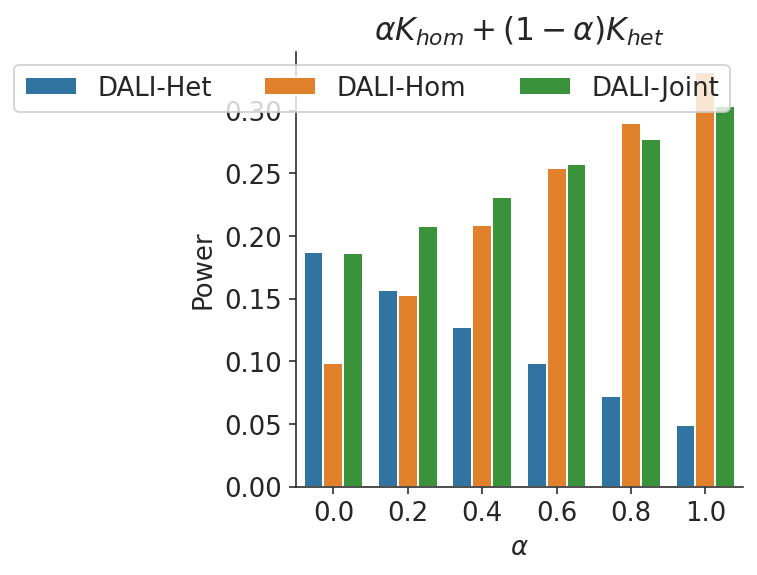

In [17]:
df_sub = df.query('simkerndisc == "global" and simkernvar == 0.01 and simoverdisp == 5')
df_sub['model'] = df_sub['model'].cat.remove_unused_categories()

fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(
    x='simkernmix', y='power', hue='model', 
    data=df_sub,
    palette=TEST_COLORS,
    ax=ax)
ax.set(title=r'$\alpha K_{hom} + (1-\alpha)K_{het}$', xlabel=r'$\alpha$', ylabel='Power')
plt.legend(ncol=4)
sns.despine()
save_panel(fig)

Het+Discrete

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


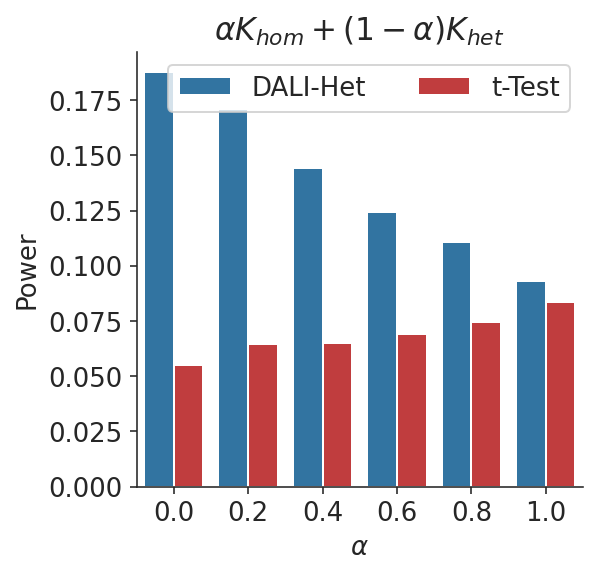

In [19]:
df_sub = df.query('simkerndisc == "cluster" and simkernvar == 0.01 and simoverdisp == 5')
df_sub['model'] = df_sub['model'].cat.remove_unused_categories()

fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(
    x='simkernmix', y='power', hue='model', 
    data=df_sub,
    palette=TEST_COLORS,
    ax=ax)
ax.set(title=r'$\alpha K_{hom} + (1-\alpha)K_{het}$', xlabel=r'$\alpha$', ylabel='Power')
plt.legend(ncol=4)
sns.despine()
save_panel(fig)